In [4]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
url = 'https://gql.tokopedia.com/graphql/SearchProductQueryV4'

In [6]:
payload = [{
    'operationName': "SearchProductQueryV4",
    'variables': {
        "params": "device=desktop&navsource=home&navsource=home&ob=23&page=1&q=azoxystrobin&related=true&rows=60&safe_search=false&scheme=https&shipping=&source=search&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=product&start=0&topads_bucket=true&unique_id=f08be1bade37d8b418e36e1022cb819c&user_addressId=&user_cityId=176&user_districtId=2274&user_id=&user_lat=&user_long=&user_postCode=&user_warehouseId=12210375&variants=&warehouses=12210375%232h%2C0%2315m"
        },
    'query': "query SearchProductQueryV4($params: String!) {\n  ace_search_product_v4(params: $params) {\n    header {\n      totalData\n      totalDataText\n      processTime\n      responseCode\n      errorMessage\n      additionalParams\n      keywordProcess\n      componentId\n      __typename\n    }\n    data {\n      banner {\n        position\n        text\n        imageUrl\n        url\n        componentId\n        trackingOption\n        __typename\n      }\n      backendFilters\n      isQuerySafe\n      ticker {\n        text\n        query\n        typeId\n        componentId\n        trackingOption\n        __typename\n      }\n      redirection {\n        redirectUrl\n        departmentId\n        __typename\n      }\n      related {\n        position\n        trackingOption\n        relatedKeyword\n        otherRelated {\n          keyword\n          url\n          product {\n            id\n            name\n            price\n            imageUrl\n            rating\n            countReview\n            url\n            priceStr\n            wishlist\n            shop {\n              city\n              isOfficial\n              isPowerBadge\n              __typename\n            }\n            ads {\n              adsId: id\n              productClickUrl\n              productWishlistUrl\n              shopClickUrl\n              productViewUrl\n              __typename\n            }\n            badges {\n              title\n              imageUrl\n              show\n              __typename\n            }\n            ratingAverage\n            labelGroups {\n              position\n              type\n              title\n              url\n              __typename\n            }\n            componentId\n            __typename\n          }\n          componentId\n          __typename\n        }\n        __typename\n      }\n      suggestion {\n        currentKeyword\n        suggestion\n        suggestionCount\n        instead\n        insteadCount\n        query\n        text\n        componentId\n        trackingOption\n        __typename\n      }\n      products {\n        id\n        name\n        ads {\n          adsId: id\n          productClickUrl\n          productWishlistUrl\n          productViewUrl\n          __typename\n        }\n        badges {\n          title\n          imageUrl\n          show\n          __typename\n        }\n        category: departmentId\n        categoryBreadcrumb\n        categoryId\n        categoryName\n        countReview\n        customVideoURL\n        discountPercentage\n        gaKey\n        imageUrl\n        labelGroups {\n          position\n          title\n          type\n          url\n          __typename\n        }\n        originalPrice\n        price\n        priceRange\n        rating\n        ratingAverage\n        shop {\n          shopId: id\n          name\n          url\n          city\n          isOfficial\n          isPowerBadge\n          __typename\n        }\n        url\n        wishlist\n        sourceEngine: source_engine\n        __typename\n      }\n      violation {\n        headerText\n        descriptionText\n        imageURL\n        ctaURL\n        ctaApplink\n        buttonText\n        buttonType\n        __typename\n      }\n      __typename\n    }\n    __typename\n  }\n}\n"
}]

In [7]:
req = requests.post(url, json=payload).json()
rows = req[0]['data']['ace_search_product_v4']['data']['products']
print(len(rows))

60


In [8]:
print(req)

[{'data': {'ace_search_product_v4': {'header': {'totalData': 591, 'totalDataText': '591', 'processTime': 0.021501551, 'responseCode': 0, 'errorMessage': '', 'additionalParams': '', 'keywordProcess': '0', 'componentId': '02.01.00.00', '__typename': 'AceSearchUnifyHeader'}, 'data': {'banner': {'position': 0, 'text': '', 'imageUrl': '', 'url': '', 'componentId': '', 'trackingOption': 0, '__typename': 'AceSearchUnifyBanner'}, 'backendFilters': '', 'isQuerySafe': True, 'ticker': {'text': '', 'query': '', 'typeId': 0, 'componentId': '', 'trackingOption': 0, '__typename': 'AceSearchUnifyTicker'}, 'redirection': {'redirectUrl': '', 'departmentId': 0, '__typename': 'AceSearchUnifyRedirection'}, 'related': {'position': 0, 'trackingOption': 0, 'relatedKeyword': '', 'otherRelated': [], '__typename': 'AceSearchUnifyRelated'}, 'suggestion': {'currentKeyword': 'azoxystrobin', 'suggestion': '', 'suggestionCount': 0, 'instead': '', 'insteadCount': 0, 'query': '', 'text': '', 'componentId': '', 'trackin

In [9]:
for i in range(0, len(rows)):
    no = i
    nama_produk = rows[i]['name']
    harga = rows[i]['price']
    rating = rows[i]['ratingAverage']
    toko = rows[i]['shop']['name']
    lokasi = rows[i]['shop']['city']
    tjl = rows[i]['labelGroups']
    terjual = ''
    for i in tjl:
        if tjl[0]['position'] == 'costperunit':
            terjual = ''
        elif tjl[0]['title'] == 'PreOrder':
            terjual = ''
        elif tjl[0]['title'] == 'Grosir':
            terjual = ''
        elif tjl[0]['title'] == 'Produk Terbaru':
            terjual = ''
        elif tjl[0]['title'] =='Cashback':
            terjual = ''
        else:
            terjual = tjl[0]['title']
    #terjual = next((rows[i]['labelGroups'][0]['title'] for item in rows[i]['labelGroups'][0] if rows[i]['labelGroups'][0]['position'] == 'integrity'), None)
    print(no, nama_produk, harga, rating, toko, lokasi, terjual)

0 Azoksistrobin / Azoxystrobin 250 EC FUNGISIDA Rp250.000 4.8 Lifeprime Bandung Cashback 1%
1 Fungisida ZPT Amistar Top Azoxystrobin 325 EC kemasan 250 ml Rp169.000 5.0 Itoo Bintang Jaya Malang Cashback 2%
2 Fungisida SKAUS 240SC 250ml - Azoxystrobin & Tebukonazol Rp125.000 5.0 Sumberjayatani Kab. Lamongan Terjual 19
3 Fungisida sistemik caminox 250SC 250ml | Azoxystrobin obat busuk daun Rp155.000  AZWAR OUTLET STORE Kab. Cirebon 
4 Syngena Amimiao Benzene Azoxystrobin Antracnose Daun Pancar Fungsi Rp210.450  ExdrowStore Tangerang Cashback 20 rb
5 Fungisida sistemik caminox 250SC 100ml | Azoxystrobin obat busuk daun Rp75.000 5.0 AZWAR OUTLET STORE Kab. Cirebon 
6 Fungisida KENISA 280 SC Isi 250ml Bahan Aktif Azoxystrobin 200g/l dan Rp273.500  PT. Marvel Nizliandry Yogyakarta 
7 Magus 325SC 200ML Fungisida Sistemik Azoxystrobin + Difenekonazol Rp174.000  7ashobi_shop Kab. Kediri 
8 SALE TERMURAH !!! AZOKSISTROBIN / AZOXYSTROBIN 250 EC FUNGISIDA Rp413.000  STAR SHOP4 Jakarta Pusat 
9 Fun

In [10]:
len(terjual)

0

In [12]:
search = 'Azoxystrobin'
url = 'https://gql.tokopedia.com/graphql/SearchProductQueryV4'

def get_param():
    params = []
    for i in range(1,27):
        param = "device=desktop&navsource=home&navsource=home&ob=23&page={}&q={}&related=true&rows=60&safe_search=false&scheme=https&shipping=&source=search&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=product&start={}&topads_bucket=true&unique_id=f08be1bade37d8b418e36e1022cb819c&user_addressId=&user_cityId=176&user_districtId=2274&user_id=&user_lat=&user_long=&user_postCode=&user_warehouseId=12210375&variants=&warehouses=12210375%232h%2C0%2315m".format(i, search, (i-1)*60)
        params.append(param)

    return params

def scraped(param):
    payload = [{
    'operationName': "SearchProductQueryV4",
    'variables': {
        "params": param
        },
    'query': "query SearchProductQueryV4($params: String!) {\n  ace_search_product_v4(params: $params) {\n    header {\n      totalData\n      totalDataText\n      processTime\n      responseCode\n      errorMessage\n      additionalParams\n      keywordProcess\n      componentId\n      __typename\n    }\n    data {\n      banner {\n        position\n        text\n        imageUrl\n        url\n        componentId\n        trackingOption\n        __typename\n      }\n      backendFilters\n      isQuerySafe\n      ticker {\n        text\n        query\n        typeId\n        componentId\n        trackingOption\n        __typename\n      }\n      redirection {\n        redirectUrl\n        departmentId\n        __typename\n      }\n      related {\n        position\n        trackingOption\n        relatedKeyword\n        otherRelated {\n          keyword\n          url\n          product {\n            id\n            name\n            price\n            imageUrl\n            rating\n            countReview\n            url\n            priceStr\n            wishlist\n            shop {\n              city\n              isOfficial\n              isPowerBadge\n              __typename\n            }\n            ads {\n              adsId: id\n              productClickUrl\n              productWishlistUrl\n              shopClickUrl\n              productViewUrl\n              __typename\n            }\n            badges {\n              title\n              imageUrl\n              show\n              __typename\n            }\n            ratingAverage\n            labelGroups {\n              position\n              type\n              title\n              url\n              __typename\n            }\n            componentId\n            __typename\n          }\n          componentId\n          __typename\n        }\n        __typename\n      }\n      suggestion {\n        currentKeyword\n        suggestion\n        suggestionCount\n        instead\n        insteadCount\n        query\n        text\n        componentId\n        trackingOption\n        __typename\n      }\n      products {\n        id\n        name\n        ads {\n          adsId: id\n          productClickUrl\n          productWishlistUrl\n          productViewUrl\n          __typename\n        }\n        badges {\n          title\n          imageUrl\n          show\n          __typename\n        }\n        category: departmentId\n        categoryBreadcrumb\n        categoryId\n        categoryName\n        countReview\n        customVideoURL\n        discountPercentage\n        gaKey\n        imageUrl\n        labelGroups {\n          position\n          title\n          type\n          url\n          __typename\n        }\n        originalPrice\n        price\n        priceRange\n        rating\n        ratingAverage\n        shop {\n          shopId: id\n          name\n          url\n          city\n          isOfficial\n          isPowerBadge\n          __typename\n        }\n        url\n        wishlist\n        sourceEngine: source_engine\n        __typename\n      }\n      violation {\n        headerText\n        descriptionText\n        imageURL\n        ctaURL\n        ctaApplink\n        buttonText\n        buttonType\n        __typename\n      }\n      __typename\n    }\n    __typename\n  }\n}\n"
    }]

    req = requests.post(url, json=payload).json()
    rows = req[0]['data']['ace_search_product_v4']['data']['products']
    #print(len(rows))
    scraped = []
    for i in range(0, len(rows)):
        no = i
        toko = rows[i]['shop']['name']
        lokasi = rows[i]['shop']['city']
        nama_produk = rows[i]['name']
        harga = rows[i]['price']
        rating = rows[i]['ratingAverage']
        tjl = rows[i]['labelGroups']
        terjual = ''
        for i in tjl:
            if tjl[0]['position'] == 'costperunit':
                terjual = ''
            elif tjl[0]['title'] == 'PreOrder':
                terjual = ''
            elif tjl[0]['title'] == 'Grosir':
                terjual = ''
            elif tjl[0]['title'] == 'Produk Terbaru':
                terjual = ''
            elif tjl[0]['title'] =='Cashback':
                terjual = ''
            else:
                terjual = tjl[0]['title']
        scraped.append((
            nama_produk, harga, rating, toko, lokasi, terjual
        ))
    return scraped

if __name__ == '__main__':
    params = get_param()
    all_data = []
    for i in range(0, len(params)):
        param = params[i]
        data = scraped(param)
        all_data.extend(data)
    #print(all_data)
    df_Azoxystrobin = pd.DataFrame(all_data, columns=['Nama Produk', 'Harga', 'Rating', 'Toko', 'Lokasi', 'Terjual'])

In [ ]:
#params_all = "device=desktop&navsource=home&navsource=home&ob=23&page={}&q={}&related=true&rows=60&safe_search=false&scheme=https&shipping=&source=search&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=product&start={}&topads_bucket=true&unique_id=f08be1bade37d8b418e36e1022cb819c&user_addressId=&user_cityId=176&user_districtId=2274&user_id=&user_lat=&user_long=&user_postCode=&user_warehouseId=12210375&variants=&warehouses=12210375%232h%2C0%2315m".format(page, start)

In [13]:
df_Azoxystrobin

,Nama Produk,Harga,Rating,Toko,Lokasi,Terjual
0,Azoksistrobin / Azoxystrobin 250 EC FUNGISIDA,Rp250.000,4.8,Lifeprime,Bandung,Cashback 1%
1,Fungisida ZPT Amistar Top Azoxystrobin 325 EC ...,Rp169.000,5.0,Itoo Bintang Jaya,Malang,Cashback 2%
2,Fungisida SKAUS 240SC 250ml - Azoxystrobin & T...,Rp125.000,5.0,Sumberjayatani,Kab. Lamongan,Terjual 19
3,Fungisida sistemik caminox 250SC 250ml | Azoxy...,Rp155.000,,AZWAR OUTLET STORE,Kab. Cirebon,
4,Syngena Amimiao Benzene Azoxystrobin Antracnos...,Rp210.450,,ExdrowStore,Tangerang,Cashback 20 rb
...,...,...,...,...,...,...
586,AZOKSISTROBIN / AZOXYSTROBIN 250 EC FUNGISIDA,Rp375.000,,Zalim_Sales,Kab. Badung,
587,AZOKSISTROBIN / AZOXYSTROBIN 250 EC FUNGISIDA ...,Rp375.000,,Toko laris 023,Samarinda,
588,[BEST] Caminox 100ml dan 250ml Fungisida bahan...,Rp135.000,,Sellercintadamai,Jakarta Barat,
589,Sale Caminox 100Ml Dan 250Ml Fungisida Bahan A...,Rp162.000,,abyl,Jakarta Timur,


In [14]:
df_Azoxystrobin['Terjual'].unique()

array(['Cashback 1%', 'Cashback 2%', 'Terjual 19', '', 'Cashback 20 rb',
       'Diskon 10 rb', 'Cashback 5%', 'Cashback 25 rb', 'Diskon 5 rb',
       'Cashback 10%', 'Diskon 3%'], dtype=object)

In [16]:
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 1', 'Terjual_num1'] = '1'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 2', 'Terjual_num1'] = '2'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 3', 'Terjual_num1'] = '3'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 4', 'Terjual_num1'] = '4'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 5', 'Terjual_num1'] = '5'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 6', 'Terjual_num1'] = '6'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 7', 'Terjual_num1'] = '7'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 8', 'Terjual_num1'] = '8'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 9', 'Terjual_num1'] = '9'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 10', 'Terjual_num1'] = '10'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 11', 'Terjual_num1'] = '11'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 12', 'Terjual_num1'] = '12'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 13', 'Terjual_num1'] = '13'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 15', 'Terjual_num1'] = '15'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 16', 'Terjual_num1'] = '16'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 18', 'Terjual_num1'] = '18'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 19', 'Terjual_num1'] = '19'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 20', 'Terjual_num1'] = '20'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 21', 'Terjual_num1'] = '21'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 22', 'Terjual_num1'] = '22'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 24', 'Terjual_num1'] = '24'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 25', 'Terjual_num1'] = '25'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 28', 'Terjual_num1'] = '28'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 30+', 'Terjual_num1'] = '30'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 50+', 'Terjual_num1'] = '50'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 60+', 'Terjual_num1'] = '60'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 80+', 'Terjual_num1'] = '80'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 250+', 'Terjual_num1'] = '250'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 500+', 'Terjual_num1'] = '500'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 750+', 'Terjual_num1'] = '750'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 1 rb+', 'Terjual_num1'] = '1000'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 3 rb+', 'Terjual_num1'] = '3000'
df_Azoxystrobin.loc[df_Azoxystrobin['Terjual'] == 'Terjual 4 rb+', 'Terjual_num1'] = '4000'

In [17]:
df_Azoxystrobin['Terjual_num1'] = df_Azoxystrobin['Terjual_num1'].astype(float)

In [18]:
df_Azoxystrobin['Rating'] = df_Azoxystrobin['Rating'].replace('', np.nan, regex=True)
df_Azoxystrobin['Rating'] = df_Azoxystrobin['Rating'].astype(float)

In [19]:
df_Azoxystrobin['Harga'] = df_Azoxystrobin['Harga'].str.replace(r'\D', '')

C:\Users\i_fes\AppData\Local\Temp\ipykernel_21584\3843042036.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_Azoxystrobin['Harga'] = df_Azoxystrobin['Harga'].str.replace(r'\D', '')


In [20]:
df_Azoxystrobin['Harga'] = df_Azoxystrobin['Harga'].astype(float)

In [21]:
df_Azoxystrobin.dtypes

Nama Produk      object
Harga           float64
Rating          float64
Toko             object
Lokasi           object
Terjual          object
Terjual_num1    float64
dtype: object

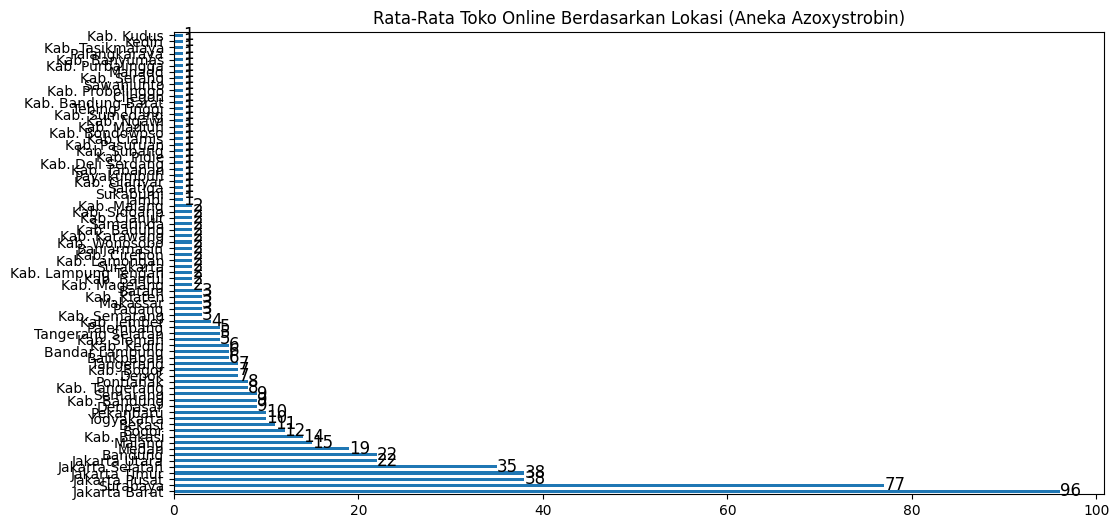

In [22]:
ax = df_Azoxystrobin['Lokasi'].value_counts() \
    .plot(kind= 'barh', figsize = (12,6), title='Rata-Rata Toko Online Berdasarkan Lokasi (Aneka Azoxystrobin)')

plt.ticklabel_format(style='plain', axis='x')

ax.bar_label(ax.containers[0], label_type = 'edge', fmt = '%d', fontsize = 12)

plt.show()

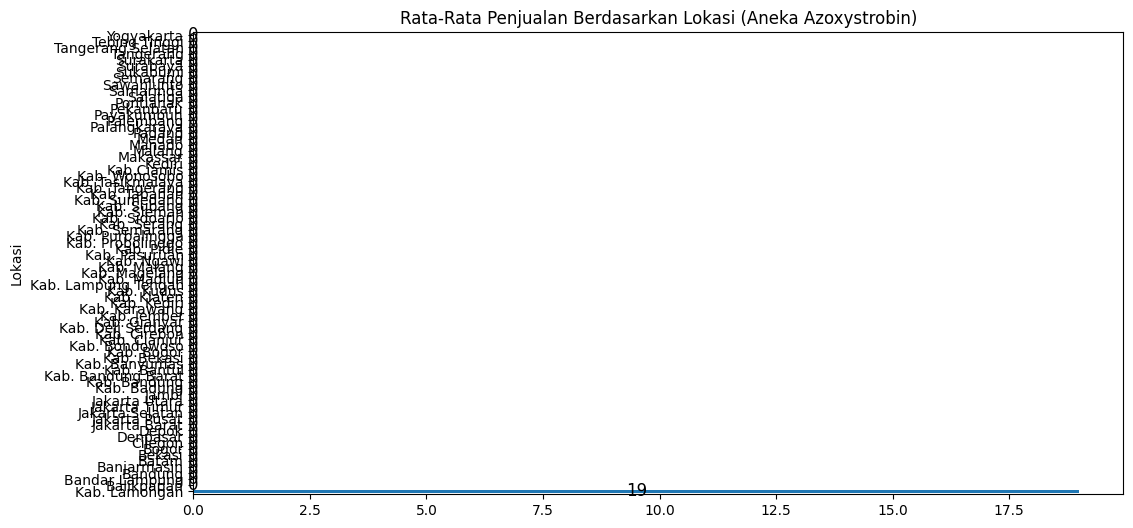

In [23]:
ax = df_Azoxystrobin.groupby('Lokasi')['Terjual_num1'].mean().sort_values(ascending=False) \
    .plot(kind= 'barh', figsize = (12,6), title='Rata-Rata Penjualan Berdasarkan Lokasi (Aneka Azoxystrobin)')
ax.bar_label(ax.containers[0], label_type = 'center', fmt = '%d', fontsize=12)
plt.show()

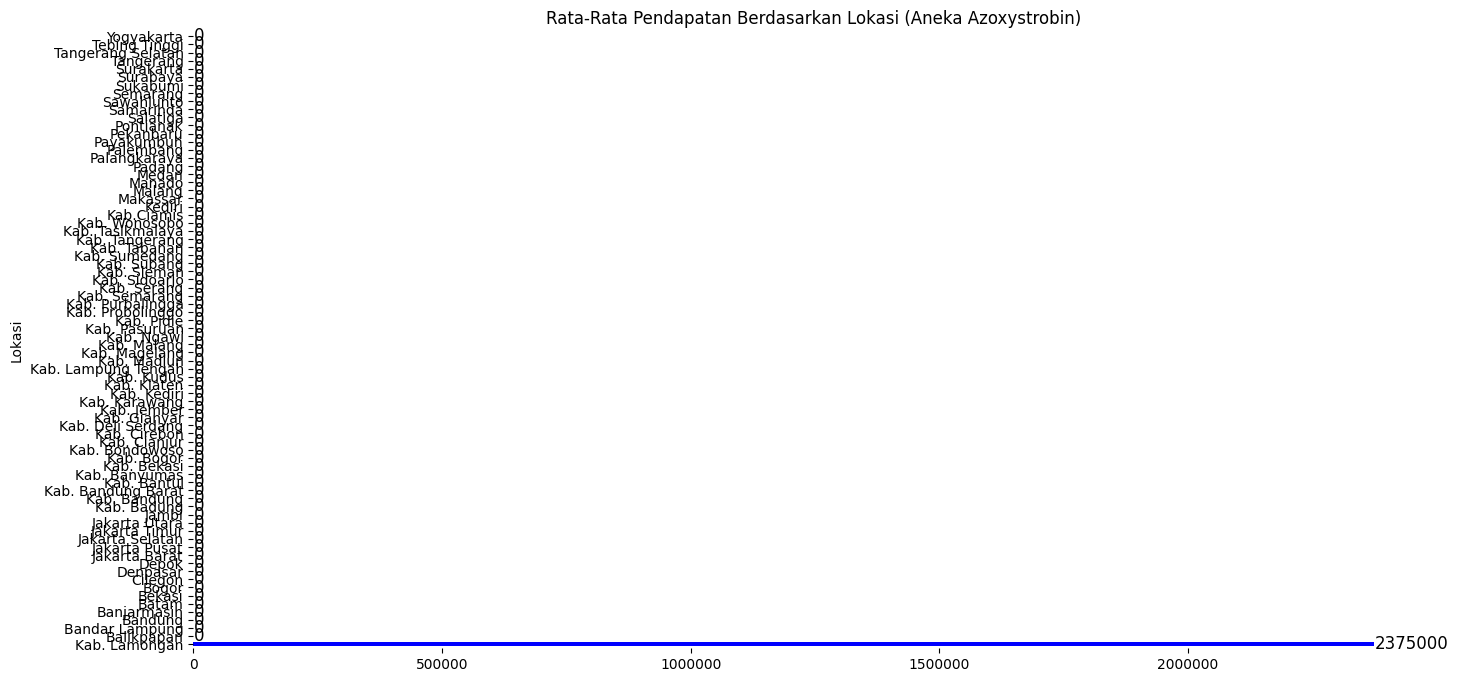

In [24]:
df_Azoxystrobin['Pendapatan'] = df_Azoxystrobin['Terjual_num1']*df_Azoxystrobin['Harga']
my_colors = list('bbgbb')

ax = df_Azoxystrobin.groupby('Lokasi')['Pendapatan'].mean().sort_values(ascending=False) \
    .plot(kind= 'barh', figsize = (16,8), title='Rata-Rata Pendapatan Berdasarkan Lokasi (Aneka Azoxystrobin)', color=my_colors)
plt.ticklabel_format(style='plain', axis='x')

ax.bar_label(ax.containers[0], label_type = 'edge', fmt = '%d', fontsize=12)
for spine in ax.spines:
    ax.spines[spine].set_visible(False)

#rects = ax.patches

#labels = [f"label{i}" for i in range(len(rects))]


#for rect, label in zip(rects, labels):
#    height = rect.get_height()
#    ax.text(
#        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
#    )

plt.show()

C:\Users\i_fes\AppData\Local\Temp\ipykernel_21584\1204150464.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_Azoxystrobin.dropna().corr()
d:\PROGRAM\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
d:\PROGRAM\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

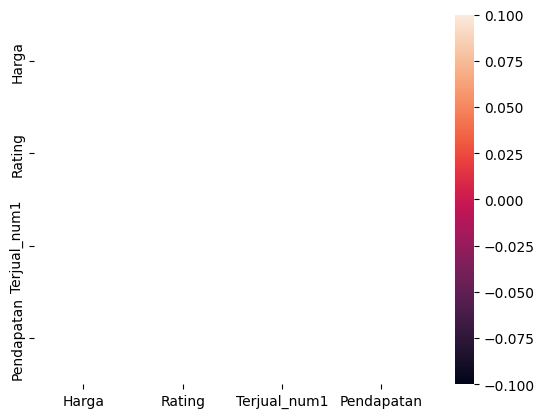

In [25]:
df_corr = df_Azoxystrobin.dropna().corr()
sns.heatmap(df_corr, annot = True)

In [ ]:
#df_Azoxystrobin.to_excel('Tokped_Daging_API.xlsx', index=False)